<a href="https://colab.research.google.com/github/arezyhs/Python-KNN-NaiveBayes-MLP/blob/main/MNIST_Classifier_with_KNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# 1. Memuat Dataset MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(4)  # Skip magic number
        num_images = int.from_bytes(f.read(4), byteorder='big')
        rows = int.from_bytes(f.read(4), byteorder='big')
        cols = int.from_bytes(f.read(4), byteorder='big')
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
    return images

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(4)  # Skip magic number
        num_labels = int.from_bytes(f.read(4), byteorder='big')
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Memuat data MNIST
X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

# Normalisasi data (skala 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [ ]:
# 2. Membuat Model KNN dan MLP

# Model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Model MLP
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, alpha=1e-4, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42)

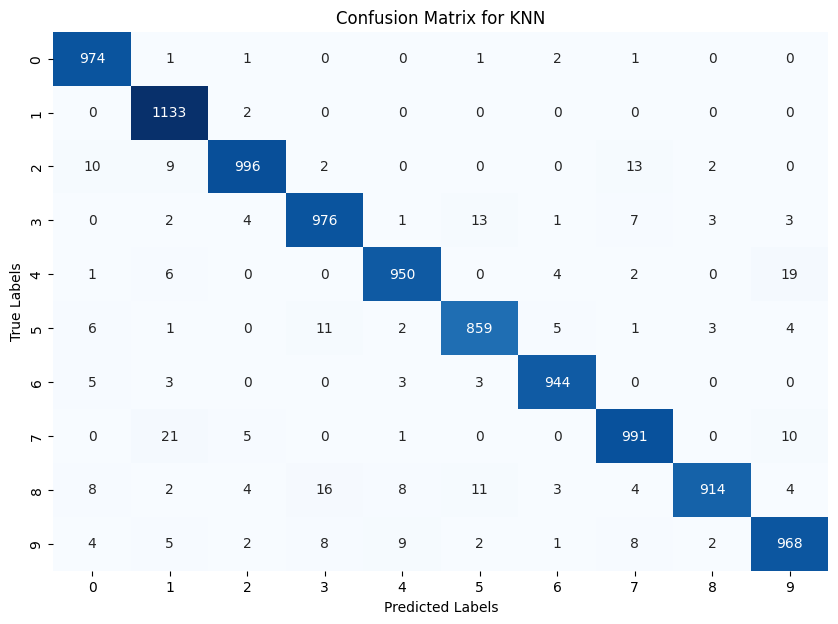

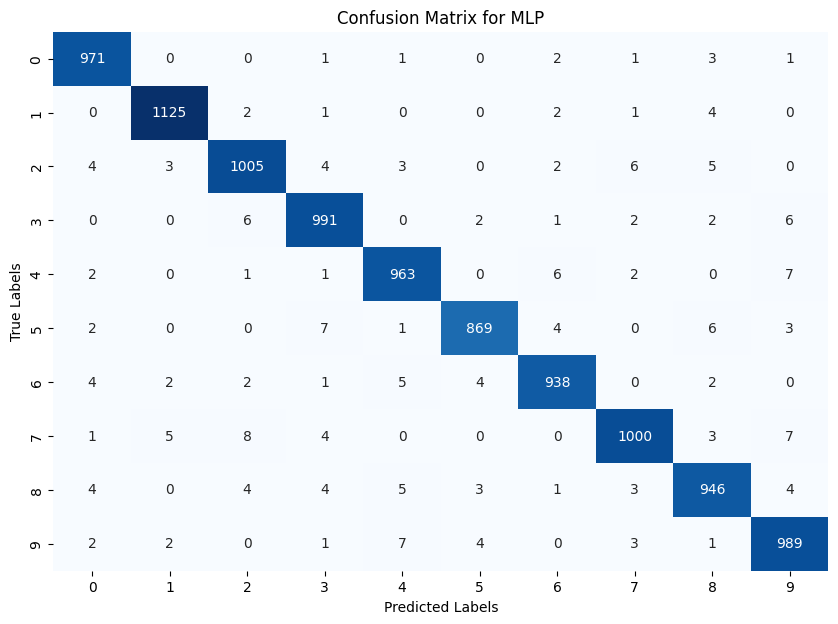

In [ ]:
# 3. Confusion Matrix dan Heatmap

# Confusion Matrix untuk KNN
knn_pred = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, knn_pred)

# Confusion Matrix untuk MLP
mlp_pred = mlp.predict(X_test)
conf_matrix_mlp = confusion_matrix(y_test, mlp_pred)

# Heatmap untuk KNN
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Heatmap untuk MLP
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for MLP")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# 4. Menghitung Akurasi Model

# Akurasi untuk KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Akurasi KNN terhadap data uji: {knn_accuracy * 100:.2f}%")

# Akurasi untuk MLP
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"Akurasi MLP terhadap data uji: {mlp_accuracy * 100:.2f}%")

Akurasi KNN terhadap data uji: 97.05%
Akurasi MLP terhadap data uji: 97.97%
